Applicant Profile:
GPA: 3.80
GRE Scores: 324
EPT Scores: 115.00

ACCEPTANCE PROBABILITIES:
Stevens Institute of Technology: 0.6280
Duke University: 0.2760
Dartmouth College: 0.1420
Cornell University: 0.1280
Columbia University: 0.0810
John Hopkins University: 0.0940
Massachusetts Institute of Technology: 0.0480
Purdue University: 0.1050
North Western University: 0.1010
University of Southern California: 0.2100
Florida State University: 0.8260


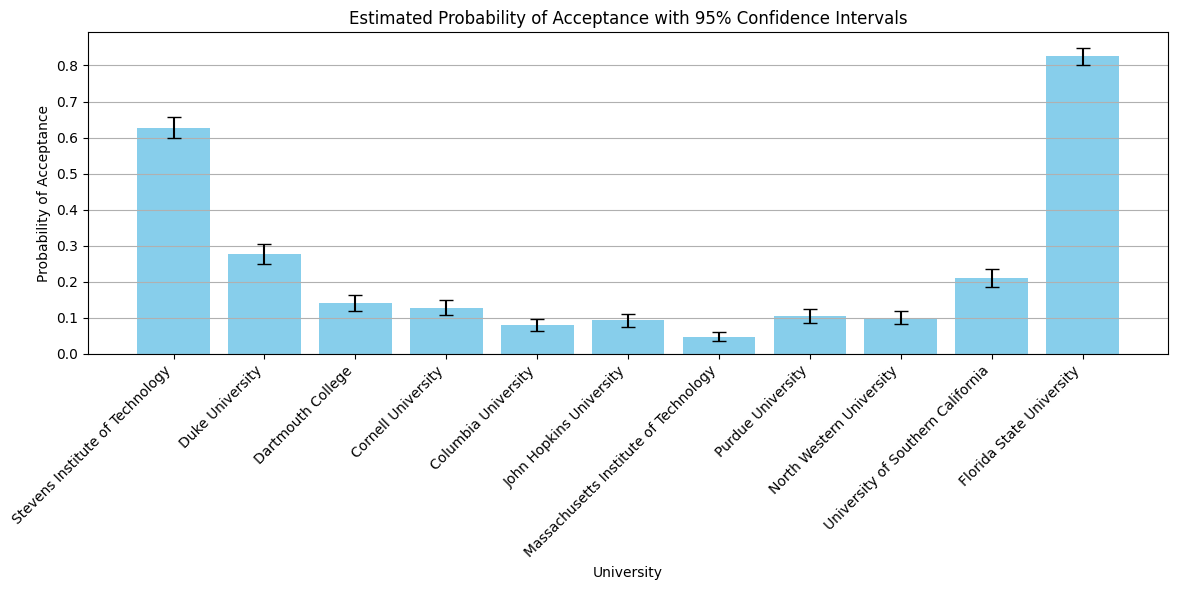

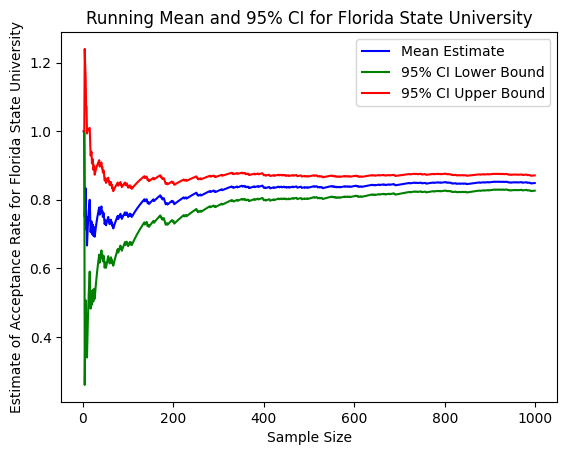

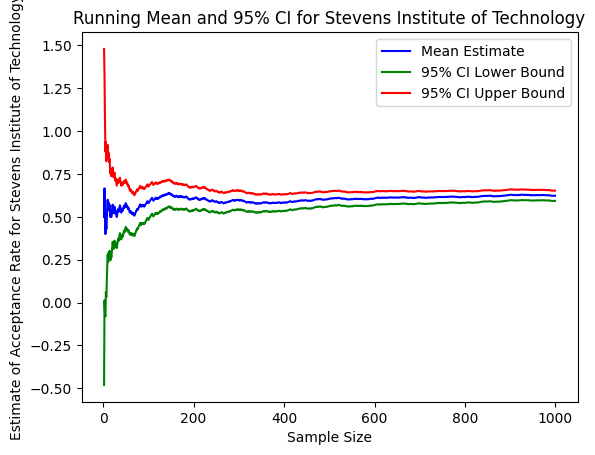

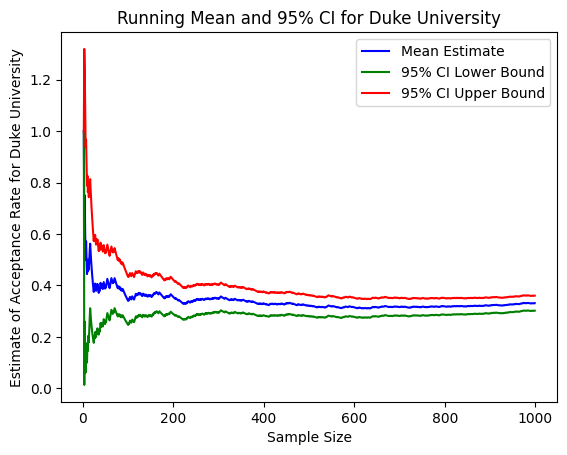

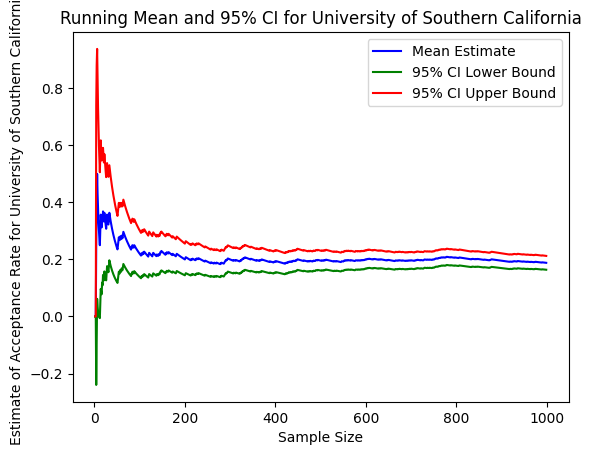

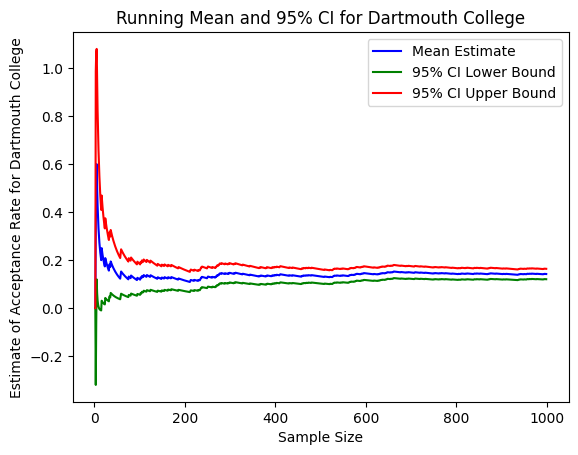

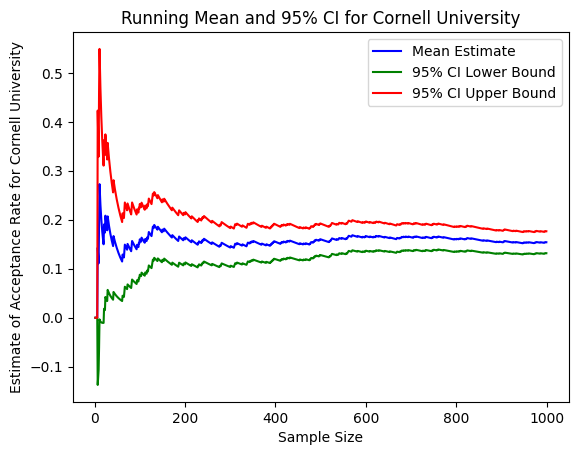

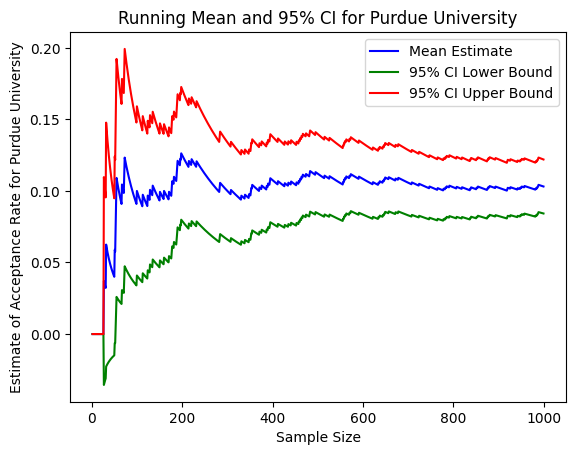

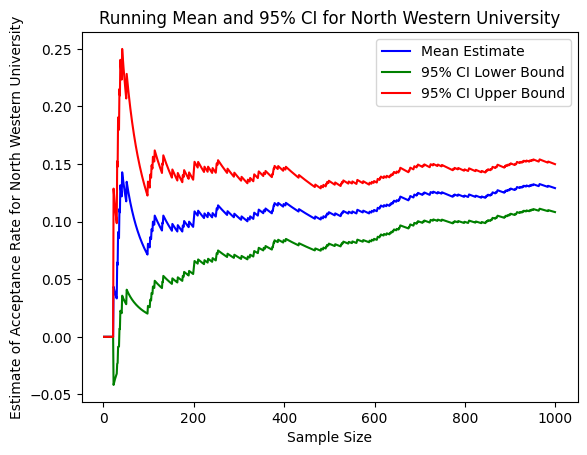

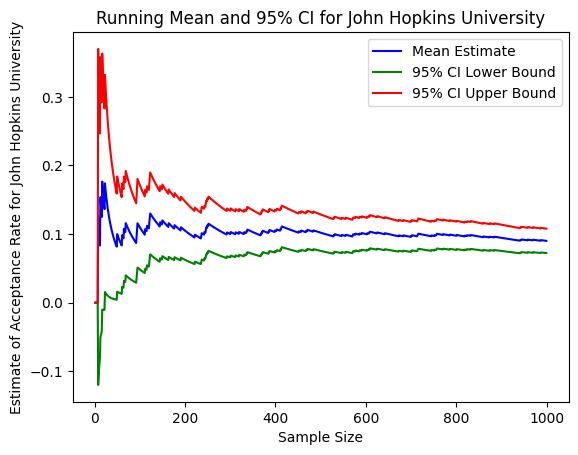

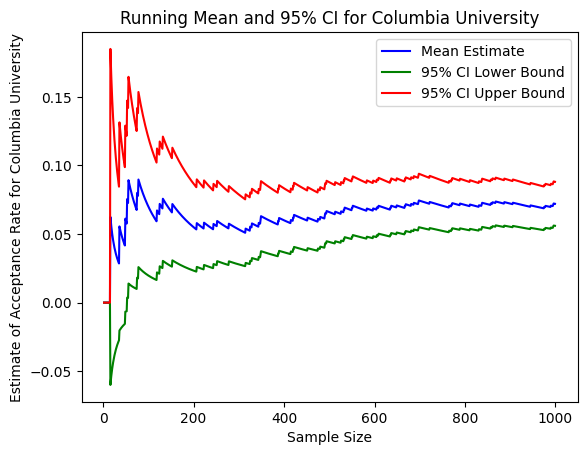

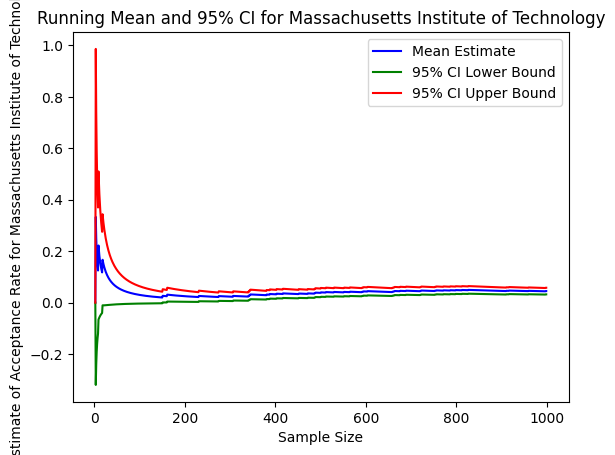

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Function to calculate the excess of the applicant's score over the minimum required score
def calculate_excess_score(applicant_score, min_score):
    return max(applicant_score - min_score, 0)

# Function to adjust the admission probability based on excess scores
def adjust_admission_probability(base_prob, gpa_excess, gre_excess, ept_excess):
    gpa_factor = 0.01
    gre_factor = 0.005
    ept_factor = 0.005
    adjusted_prob = min(base_prob + gpa_excess * gpa_factor + gre_excess * gre_factor + ept_excess * ept_factor, 1)
    return adjusted_prob

# Function to run the simulation for each university
def run_simulation(applicant, university, num_iterations):
    acceptances = []
    for _ in range(num_iterations):
        # Calculate the excess scores
        gpa_excess = calculate_excess_score(applicant["gpa"], university["min_gpa"])
        gre_excess = calculate_excess_score(applicant["test_grescores"], university["min_grescores"])
        ept_excess = calculate_excess_score(applicant["test_eptscores"], university["min_eptscores"])

        # Adjust the admission probability
        adjusted_prob = adjust_admission_probability(university["admission_rate_distribution"](), gpa_excess, gre_excess, ept_excess)

        # Simulate admission decision
        admitted = np.random.random() < adjusted_prob
        acceptances.append(1 if admitted else 0)
    return np.array(acceptances)

# Define a random but realistic applicant profile
applicant = {
    "gpa": 3.8,  # GPA between 3.0 and 4.0
    "test_grescores": 324,  # GRE scores between 260 and 340
    "test_eptscores": 115,  # EPT scores between 80 and 120
}


print(f"Applicant Profile:\nGPA: {applicant['gpa']:.2f}\nGRE Scores: {applicant['test_grescores']}\nEPT Scores: {applicant['test_eptscores']:.2f}")

# Define universities and their attributes
universities = {
    "Stevens Institute of Technology": {
        "min_gpa": 3.5,
        "admission_rate_distribution": lambda: np.random.uniform(0.35, 0.5),
        "min_grescores": 305,
        "min_eptscores": 90,

    },
    "Duke University": {
        "min_gpa": 3.7,
        "admission_rate_distribution": lambda: np.random.uniform(0.18, 0.31),
        "min_grescores": 319,
        "min_eptscores": 105,

    },
     "Dartmouth College": {
        "min_gpa": 3.8,
        "admission_rate_distribution": lambda: np.random.uniform(0.09, 0.20),
        "min_grescores": 323,
        "min_eptscores": 115,

    },
     "Cornell University": {
        "min_gpa": 3.8,
        "admission_rate_distribution": lambda: np.random.uniform(0.08, 0.15),
        "min_grescores": 323,
        "min_eptscores": 112,

    },
     "Columbia University": {
        "min_gpa": 3.9,
        "admission_rate_distribution": lambda: np.random.uniform(0.04, 0.09),
        "min_grescores": 325,
        "min_eptscores": 115,

    },
     "John Hopkins University": {
        "min_gpa": 3.7,
        "admission_rate_distribution": lambda: np.random.uniform(0.03, 0.05),
        "min_grescores": 318,
        "min_eptscores": 110,

    },

     "Massachusetts Institute of Technology": {
        "min_gpa": 4.0,
        "admission_rate_distribution": lambda: np.random.uniform(0.03, 0.05),
        "min_grescores": 335,
        "min_eptscores": 118,

    },
    "Purdue University": {
        "min_gpa": 3.6,
        "admission_rate_distribution": lambda: np.random.uniform(0.03, 0.05),
        "min_grescores": 317,
        "min_eptscores": 110,

    },
    "North Western University": {
        "min_gpa": 3.8,
        "admission_rate_distribution": lambda: np.random.uniform(0.08, 0.10),
        "min_grescores": 321,
        "min_eptscores": 111,

    },
    "University of Southern California": {
        "min_gpa": 3.8,
        "admission_rate_distribution": lambda: np.random.uniform(0.11, 0.14),
        "min_grescores": 316,
        "min_eptscores": 108,

    },
    "Florida State University": {
         "min_gpa": 3.3,
         "admission_rate_distribution": lambda: np.random.uniform(0.55, 0.60),
         "min_grescores": 301,
         "min_eptscores": 85,

    },

    # Add more universities if needed
}

# Monte Carlo settings
num_iterations = 1000
confidence_level = 0.05
z_crit = stats.norm.ppf(1 - confidence_level / 2)

# Run the simulation for each university
university_acceptances = {uni: run_simulation(applicant, data, num_iterations) for uni, data in universities.items()}

# Calculate acceptance probabilities
acceptance_probabilities = {uni: acceptances.mean() for uni, acceptances in university_acceptances.items()}

# Print acceptance probabilities
print("\nACCEPTANCE PROBABILITIES:")
for uni, prob in acceptance_probabilities.items():
    print(f"{uni}: {prob:.4f}")

# Calculate confidence intervals
confidence_intervals = {uni: z_crit * np.sqrt(prob * (1 - prob) / num_iterations) for uni, prob in acceptance_probabilities.items()}

# Visualization
plt.figure(figsize=(12, 6))
bars = plt.bar(university_acceptances.keys(), acceptance_probabilities.values(), color='skyblue', yerr=confidence_intervals.values(), capsize=5)
plt.xlabel("University")
plt.ylabel("Probability of Acceptance")
plt.title("Estimated Probability of Acceptance with 95% Confidence Intervals")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Identify top three universities based on acceptance probabilities
top_unis = sorted(acceptance_probabilities, key=acceptance_probabilities.get, reverse=True)[:12]

for uni in top_unis:
    # Run the simulation for this university with the correct number of iterations
    acceptance_samples = run_simulation(applicant, universities[uni], num_iterations)

    # Compute running statistics
    win_mean = np.array([np.average(acceptance_samples[0:i]) for i in range(2, len(acceptance_samples))])
    win_ci = z_crit * np.array([stats.sem(acceptance_samples[0:i]) for i in range(2, len(acceptance_samples))])

    # Create a plot for this university
    plt.figure()
    plt.plot(range(2, len(acceptance_samples)), win_mean, 'b', label='Mean Estimate')
    plt.plot(range(2, len(acceptance_samples)), win_mean - win_ci, 'g', label='95% CI Lower Bound')
    plt.plot(range(2, len(acceptance_samples)), win_mean + win_ci, 'r', label='95% CI Upper Bound')
    plt.xlabel('Sample Size')
    plt.ylabel(f'Estimate of Acceptance Rate for {uni}')
    plt.title(f'Running Mean and 95% CI for {uni}')
    plt.legend(loc='best')
    plt.show()